In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import glob
import random
import numpy as np
from scipy import misc

def load_dataset():

    os.chdir('/content/drive/My Drive/input_images2/')

    train_smile = glob.glob("train/smile/*")
    train_not_smile = glob.glob("train/not_smile/*")
    val_smile = glob.glob("validation/smile/*")
    val_not_smile = glob.glob("validation/not_smile/*")
    test_smile = glob.glob("test2/smile/*")
    test_not_smile = glob.glob("test2/not_smile/*")
    
    X_train = [None] * len(train_smile + train_not_smile)
    y_train = [None] * len(train_smile + train_not_smile)
    
    X_val = [None] * len(val_smile + val_not_smile)
    y_val = [None] * len(val_smile + val_not_smile)
    
    X_test = [None] * len(test_smile + test_not_smile)
    y_test = [None] * len(test_smile + test_not_smile)
    

    for index, image in enumerate(train_smile):
        im = misc.imread(image, flatten=False).astype(np.float64)
        X_train[index] = im
        y_train[index] = 1

    ts_length = len(train_smile)
    print (ts_length)

    for index, image in enumerate(train_not_smile):
        im = misc.imread(image, flatten=False).astype(np.float64)
        X_train[ts_length + index] = im
        y_train[ts_length + index] = 0
        
    combined = list(zip(X_train, y_train))
    random.shuffle(combined)
    X_train[:], y_train[:] = zip(*combined)
    

    for index, image in enumerate(val_smile):
        im = misc.imread(image, flatten=False).astype(np.float64)
        X_val[index] = im
        y_val[index] = 1

    vs_length = len(val_smile)

    for index, image in enumerate(val_not_smile):
        im = misc.imread(image, flatten=False).astype(np.float64)
        X_val[vs_length + index] = im
        y_val[vs_length + index] = 0
        
    combined = list(zip(X_val, y_val))
    random.shuffle(combined)
    X_val[:], y_val[:] = zip(*combined)
    
    
    for index, image in enumerate(test_smile):
        im = misc.imread(image, flatten=False).astype(np.float64)
        X_test[index] = im
        y_test[index] = 1

    test_smile_length = len(test_smile)

    for index, image in enumerate(test_not_smile):
        im = misc.imread(image, flatten=False).astype(np.float64)
        X_test[test_smile_length + index] = im
        y_test[test_smile_length + index] = 0

    combined = list(zip(X_test, y_test))
    random.shuffle(combined)
    X_test[:], y_test[:] = zip(*combined)


    return X_train, y_train, X_val, y_val, X_test, y_test

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


770


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be 

In [4]:
print (len(X_train))
print (X_train[0].shape)
print (len(X_val))

1540
(50, 34, 3)
660


In [0]:
from PIL import Image
import PIL.Image
from io import StringIO, BytesIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))
    
    
#showarray(X_train[0].transpose(1, 2, 0))

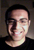

1


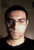

0


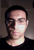

0


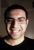

1


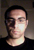

0


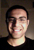

1


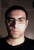

0


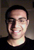

1


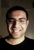

1


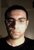

0


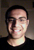

1


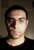

0


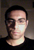

0


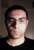

0


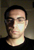

0


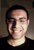

1


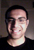

1


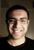

1


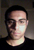

0


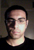

0


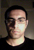

0


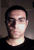

0


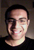

1


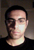

0


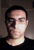

0


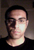

0


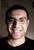

1


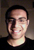

1


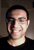

1


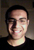

1


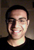

1


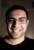

1


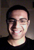

1


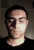

0


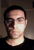

0


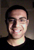

1


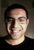

1


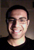

1


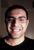

1


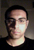

0


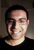

1


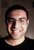

1


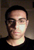

0


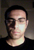

0


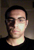

0


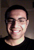

1


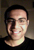

1


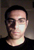

0


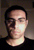

0


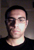

0


In [299]:
for i in range(len(X_test)):
  showarray(X_test[i].astype('uint8'))
  print (y_test[i])

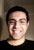

1


In [301]:
showarray(X_train[99].astype('uint8'))
print (y_train[99])

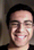

1


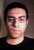

0


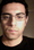

0


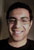

1


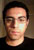

0


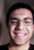

1


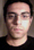

0


In [302]:
showarray(X_train[4].astype('uint8'))
print (y_train[4])

showarray(X_train[9].astype('uint8'))
print (y_train[9])

showarray(X_train[21].astype('uint8'))
print (y_train[21])

showarray(X_train[61].astype('uint8'))
print (y_train[61])

showarray(X_train[131].astype('uint8'))
print (y_train[131])

showarray(X_train[133].astype('uint8'))
print (y_train[133])

showarray(X_train[231].astype('uint8'))
print (y_train[231])

In [0]:
X_train = np.stack(X_train, axis=0)

In [7]:
X_train.shape

(1540, 50, 34, 3)

In [0]:
y_train = np.asarray(y_train)

In [9]:
y_train.shape

(1540,)

In [0]:
X_val = np.stack(X_val, axis=0)
X_test = np.stack(X_test, axis=0)

y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

In [11]:
import keras
from keras import regularizers

Using TensorFlow backend.


In [0]:
my_init = keras.initializers.glorot_uniform(seed=1)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(50, 34, 3), padding='same'))
model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-5))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.08)))
model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-5))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.08)))
model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-5))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.08)))
model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-5))
model.add(Dropout(0.2))
# model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-5))
# model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-5))
# model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.08)))
model.add(Dropout(0.5))
#model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 50, 34, 32)        896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 50, 34, 32)        128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 50, 34, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 34, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 50, 34, 32)        128       
_________________________________________________________________
dropout_17 (Dropout)         (None, 50, 34, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 50, 34, 32)        9248      
__________

In [0]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.0000001)

adam = optimizers.Adam(lr=0.000001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

In [0]:
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1540/1540 [==============================] - 8s 5ms/step - loss: 88.3699 - acc: 0.7792
Epoch 2/15
1540/1540 [==============================] - 4s 2ms/step - loss: 86.3091 - acc: 0.9104
Epoch 3/15
1540/1540 [==============================] - 4s 2ms/step - loss: 84.8749 - acc: 0.9338
Epoch 4/15
1540/1540 [==============================] - 4s 2ms/step - loss: 83.6317 - acc: 0.9623
Epoch 5/15
1540/1540 [==============================] - 4s 2ms/step - loss: 82.5528 - acc: 0.9584
Epoch 6/15
1540/1540 [==============================] - 4s 2ms/step - loss: 81.5366 - acc: 0.9656
Epoch 7/15
1540/1540 [==============================] - 4s 2ms/step - loss: 80.5729 - acc: 0.9695
Epoch 8/15
1540/1540 [==============================] - 4s 2ms/step - loss: 79.6645 - acc: 0.9779
Epoch 9/15
1540/1540 [==============================] - 4s 2ms/step - loss: 78.8089 - acc: 0.9747
Epoch 10/15
1540/1540 [==============================] - 4s 2ms/step - loss: 77.9728 - acc: 0.9812
Epoch 11/15
1540/15

In [40]:
model.evaluate(X_val, y_val)

660/660 [==============================] - 1s 1ms/step


[73.9757368145567, 0.8924242417017619]

In [41]:
model.evaluate(X_test, y_test)

50/50 [==============================] - 0s 668us/step


[73.94439758300781, 0.9199999904632569]

In [0]:
pred = model.predict(X_test)

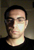

Not smiling
 


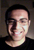

Smile
 


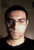

Smile
 


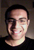

Smile
 


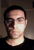

Not smiling
 


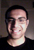

Smile
 


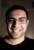

Smile
 


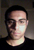

Not smiling
 


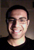

Smile
 


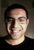

Not smiling
 


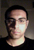

Not smiling
 


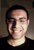

Smile
 


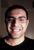

Smile
 


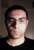

Not smiling
 


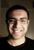

Smile
 


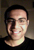

Smile
 


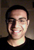

Smile
 


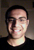

Smile
 


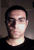

Not smiling
 


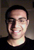

Smile
 


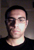

Not smiling
 


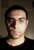

Not smiling
 


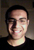

Smile
 


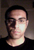

Not smiling
 


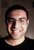

Smile
 


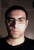

Not smiling
 


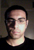

Not smiling
 


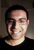

Smile
 


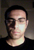

Smile
 


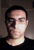

Not smiling
 


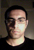

Not smiling
 


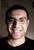

Smile
 


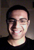

Smile
 


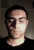

Not smiling
 


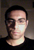

Not smiling
 


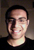

Smile
 


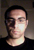

Not smiling
 


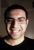

Smile
 


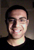

Smile
 


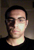

Not smiling
 


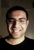

Smile
 


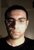

Not smiling
 


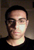

Not smiling
 


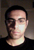

Not smiling
 


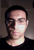

Smile
 


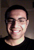

Smile
 


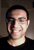

Smile
 


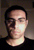

Not smiling
 


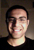

Smile
 


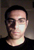

Not smiling
 


In [44]:
for i in range(len(X_test)):
  showarray(X_test[i].astype('uint8'))
  if (pred[i] >= 0.5):
    print ("Smile")
  else:
    print ("Not smiling")
  print (" ")